In [3]:
from gurobipy import *
import random
from random import randint
#import numpy as np, numpy.random

# Optimization
# 1. Variables & Constraint

#### Let $B_T$ to be the total budget
#### Let $H = O \uplus V \uplus R= \{1 \dots n\}$ to be the set represents the housing stock of the city
#### Let $O \subseteq H$ to be the set represents the houses occupied by owner
#### Let $R \subseteq H$ to be the set represents the houses occupied by renter
#### Let $V \subseteq H$ to be the set represents the houses are vacant
#### Let $E$ to be the collection of all neighbors
#### Let $C = \{ (i,j) \; | \; i\in O\uplus R , j \in V \}$
###### Let $I_{V}(i)$ to be an indicator function represents that if the houses are vacant  
###### Let $I_{O}(i)$ to be an indicator function represents that if the houses are occupied by owner  
###### Let $I_{R}(i)$ to be an indicator function represents that if the houses are occupied by renter
###### Let $I_{S_2}(i)$ to be an indicator function represents that if the houses are 2-Stroy
###### Let $I_{S_3}(i)$ to be an indicator function represents that if the houses are 3-Story 

## - cost variables

###### Let $c_i$ to be the cost to demplish house i
>$$ c_i = 13000\times I_{S_2}(i) + 22000 \times I_{S_3}(i) + 85000 \times I_{R}(i) + 170000 \times I_{O}(i) $$

###### Let $w_{ij}$ to be the average price building the wall between houses ij, and $w_i$ and $w_j$ to be the difference between the price to build the wall for building $i/j$ minus $w_{ij}$ for all $(i,j) \in E$
>$$ w_{ij} = {14000\times I_{S_2}(i) + 25000\times I_{S_3}(i) + 14000\times I_{S_2}(j) + 25000\times I_{S_3}(j)\over 2 } $$
>$$ \mbox{ which won't be affacted by the value of} x_i \mbox{ and } x_j $$

>$$ w_i = (14000\times I_{S_2}(i) + 25000\times I_{S_3}(i)) - w_{ij} $$
>$$ w_j = (14000\times I_{S_2}(j) + 25000\times I_{S_3}(j)) - w_{ij} $$

>$\therefore$ The cost for building the wall will be
> $$ w_{ij}z_{ij} + w_i(1-x_i) + w_j(1-x_j) $$
>> Note that when houses ij have same height, $w_i$ and $w_j$ will be 0 

>> and when $z_{ij} = 0$, $w_i(1-x_i) + w_j(1-x_j) = 0$.

#### Let $p_{ij}$ to be th cost reduction building i,j demolish together for all $(i,j) \in E$
> Let's set $p_{ij}$ is same for neighbors


## - Optimization Variables

###### Let $x_i$  to be a binary variable  $\forall i \in H$, which if $x_i$ = 1 then house i would be demolished
###### Let $z_{ij} = x_i\oplus x_j \;\; \forall (ij) \in E$
$$ \begin{array}{rll}
    \text{s.t.} & x_i - x_j - z_{ij} \leq 0 \\
                & x_j - x_i - z_{ij} \leq 0 \\
                & x_i + x_j + z_{ij} \leq 2 \\
                &-x_i - x_j + z_{ij} \leq 0 \\ 
                & z_{ij} \in \{0,1\}
    \end{array}
$$
###### Let $y_{ij} = x_i\times x_j \;\; \forall (ij) \in E$
$$ \begin{array}{rll}
    \text{s.t.} & x_i + x_j - y_{ij} \leq 1 \\
                & -x_i + y_{ij} \leq 0 \\
                & -x_j + y_{ij} \leq 0 \\
                & y_{ij} = \{0,1\}
    \end{array}
$$



## - Total Cost Constraint

$$  
    \sum_{i} c_ix_i +  \sum_{(ij) \in E}w_{ij}(x_i \oplus x_j) + \sum_{(ij) \in E} w_i(1-x_i) + \sum_{(ij) \in E} w_j(1-x_j)  -\sum_{(ij) \in E}p_{ij}x_ix_j  \\ = \sum_{i} c_ix_i +  \sum_{(ij) \in E}w_{ij}z_{ij} + \sum_{(ij) \in E} w_i(1-x_i) + \sum_{(ij) \in E} w_j(1-x_j) -\sum_{(ij) \in E}p_{ij}y_{ij} \leq B_T
$$

- update version (01-10-18)

$$  
    \sum_{i} c_ix_i + \sum_{(ij) \in E} w_i(1-x_i)x_j + \sum_{(ij) \in E} w_j(1-x_j)x_i -\sum_{(ij) \in E}p_{ij}y_{ij} 
    \\ = \sum_{i} c_ix_i + \sum_{(ij) \in E} w_ix_j + \sum_{(ij) \in E} w_jx_i -\sum_{(ij) \in E}(w_i+w_j+p_{ij})y_{ij}  \leq B_T
$$

> - We only need $y_{ij}$
> - Note that $w_i$ and $w_j$ here is the cost for each building (not what we defined before)





# 2. Objective Function

## - Tearing down as many vacant houses as possible (Original)

> $$ \max \sum_{i\in V} x_i $$

## - Weight Function (Current model using in Research)

> #### Let $h_{i,j} \in R \geq 0$ to be the function for all $i \in O\uplus R$ and $j \in V$ as measurement

> Note that $h_{i,j}$ is a function to measure the cumulative happiness/ profit/ the probibility to be safe for every pair $(i,j)$ where $i \in O\uplus R$ , $j \in V$ in the database

--------------


> ##### $h_{i,j}$ can be ... 

> - Cumulative risk for each house in $ O\uplus R$ : $\sum_{j\in V} h_{i,j}$

> - propotional to the ${1\over d^c}$

> - Indicator function 



# 3. ILP Model 

## - Weight Function ILP 

$$ \begin{array}{rll}
    \text{min} & \sum_{i,j\in C} h_{i,j}(1-x_i)(1-x_j) \\
    =\text{min} & \sum_{i,j\in C} h_{i,j}(1-x_i -x_j+y_{ij}) \\
    \\[1pt] 
    \text{s.t.} &  \sum_{i} c_ix_i + \sum_{(ij) \in E} w_ix_j + \sum_{(ij) \in E} w_jx_i -\sum_{(ij) \in E}(w_i+w_j+p_{ij})y_{ij}  \leq B_T \\
    \\
    & \forall (i,j) \in E \uplus C\\
    & \;\;\;\;\;x_i + x_j - y_{ij} \leq 1 \\
    & \;\;\;\;\;-x_i + y_{ij} \leq 0 \\
    & \;\;\;\;\;-x_j + y_{ij} \leq 0 \\
    \\
    & x_i \in \lbrace 0,1 \rbrace \;\; \forall  i \in H\\
    & y_{ij} \in \lbrace 0,1 \rbrace \;\; \forall  (i,j) \in E \uplus C\\
    \end{array}
$$

###### $\hspace{7cm}$ ~~(Plus the constraint for the delta method)~~


> - To save space, we can set all (i, j) pair in E to be in same format as C if possible. ( Depends on how we construct C )

- #### ~~Delta Method for Wight Function ILP (old version)~~

> ~~- New Variables~~

> ~~Let $d_e$ to be the max distance that the vacant house will have affect the safety of the occupied house~~

> ~~Let $\delta_{ij} = (1-x_i)(1-x_j) \;\; \forall i \in O\uplus R \;,\;\forall j \in V$
$$ \begin{array}{rll}
    \text{s.t.} & -\delta_{ij} - x_i - x_j  \leq -1 \\
                & x_i + \delta_{ij} \leq 1 \\
                & x_j + \delta_{ij} \leq 1 \\
                & \delta_{ij} = \{0,1\}
    \end{array}
$$~~
> ~~- Then the number of variables $$= |H| + 2|E| + |O\uplus R|\times|V| $$~~




> ~~$\delta_{ij} $ will affect the result iff both houses i,j are not demolished.
$$ C = \{ (i,j) \;\;|\;\; i \in O \uplus R \;\;\text{ and }\;\; j \in V \} \\ $$
$$ \begin{array}{rll}
    & \forall\; (i,j)\in C \\
    & \;\;\;\;\;x_i + \delta_{ij} \leq 1 \\
    & \;\;\;\;\;x_j + \delta_{ij} \leq 1 \\
    & \;\;\;\;\;-x_i - x_j - \delta_{ij} \leq -1 \\
    & \delta_{ij} \in \lbrace 0,1 \rbrace \\[1pt]\\
    \end{array}
$$~~

## - Weight Function ILP Transformation (Big M method)

$$ \min\sum_{i}\sum_{j} h_{i,j}(1-x_i)(1-x_j) $$
$$ = \max -\sum_{i}\sum_{j} h_{i,j}(1-x_i)(1-x_j) = \max \sum_{i}\sum_{j} h_{i,j}(1-x_i)(x_j-1) $$ 

> Therefore, when $x_i = 0 $

> We get

> $$ \min \sum_j h_{i,j} (1-x_j) = \max \sum_j h_{i,j} (x_j-1) $$

> then we can set $t_i$ to be

> $$ t_i \leq \sum_j h_{i,j}(x_j-1) \;,\; \mbox{ for all } j \in V$$

> and $$ t_i \leq M(1-x_i) $$

However, by the way we set up the firt inequality to be negative, no matter what $x_i$ is, the second inequality will always satisfy the first inequality. Thus, we should let the first bound to be sufficient large if the $x_i = 0$.

> $$ \therefore \;\;\forall \; i \in O\uplus R \;\;\; ,\;\; t_i \leq \sum_{j\in V} h_{i,j}(x_j-1)  + Mx_i $$


Thus when $x_i = 0$, $\max t_i = 0$ which means there is no effect for occupied house i. The objective optimal value will be the negative optimal value of the original problem

  $$\begin{array}{rll}
    & \forall \;i \in O \uplus R \\
    & t_{i} \leq \sum_{j\in V}h_{i,j}(x_j-1) + M(x_i) \\ 
    & t_{i} \in \{-\infty,0\} \\[1pt]\\
    & \text{max} \;\;\; \sum_{i \in O\uplus R} \; t_{i} \\
    \end{array}$$

Thus, The new ILP model will be

$$ \begin{array}{rll}
    \text{max} & \sum_{i \in O\uplus R} \; t_{i}  \\
    \\[1pt] 
    \text{s.t.} &  \sum_{i} c_ix_i + \sum_{(ij) \in E} w_ix_j + \sum_{(ij) \in E} w_jx_i -\sum_{(ij) \in E}(w_i+w_j+p_{ij})y_{ij}  \leq B_T \\
    \\
    & \forall (i,j) \in E \\
    & \;\;\;\;\;x_i + x_j - y_{ij} \leq 1 \\
    & \;\;\;\;\;-x_i + y_{ij} \leq 0 \\
    & \;\;\;\;\;-x_j + y_{ij} \leq 0 \\
    & \forall \;i \in O \uplus R \\
    & \;\;\;\;\; t_{i} \leq \sum_{j\in V}h_{i,j}(x_j-1) + M(x_i) \\
    \\
    & x_i \in \lbrace 0,1 \rbrace \;\; \forall  i \in H\\
    & y_{ij} \in \lbrace 0,1 \rbrace \;\; \forall  (i,j) \in E \\
    & t_i \; \in \lbrace -\infty,0 \rbrace \;\; \forall  i \in O\uplus R \\
    \end{array}
$$


###  Complexity Analysis after using Big M 

> - num of ILP variables

>> - Before: $$= |O\uplus R \uplus V| + |E| \uplus |O\uplus R|\times|V| \leq |H| + |E| + |C| $$

>> - Big M Method: $$= |H| + |E| + |O\uplus R|$$

> - num of constraint

>> - Before: $$ \leq  1 + 3|E| + 3|C|$$

>> - Big M Method: $$= 1 + 3|E| +  |O\uplus R|$$




# 4. Example 
$$ \begin{array}{rll} & x_1 \hspace{10cm} o_4 - x_2 - o_5\\ 
    & | \hspace{10cm}\;\;\;\;\;\;\;\;\;\; | \\
    & o_3 \hspace{10cm}\;\;\;\;\;\;\; o_6 
\end{array} $$

### Grid Map

In [2]:
from IPython.display import HTML as html_print
def PrintResult(m,x):
    border = "-"
    for i in xrange(len(m[0])):
        border += "-"
    border = 2*border 
    print border
    
    for i in xrange(len(m)):
        temp = "|"
        for j in xrange(len(m[i])):
            if m[i][j][0] != 0:
                if x[m[i][j]].X == 1.0 or (abs(x[m[i][j]].X - 1.0) <= 0.0000001):
                    temp += "\x1b[41m" + str(m[i][j][0]) + "\x1b[0m "  #ANSI escape code
                else:
                    temp += str(m[i][j][0]) + " "
            else:
                temp += "  "
                                
            
        print temp + "|"
    print border

In [3]:
def GetGridMap(size=14,example = None):
    
    Size = size
    CRoads = random.sample(xrange(1,Size-2), Size/2)
    RRoads = random.sample(xrange(1,Size-2), Size/2)
    Map = [[[0,(i,j),None] if (i == 0 or j==0 
                    or i == Size-1 or j == Size-1 
                    or i in RRoads or j in CRoads) else [1,(i,j),None] 
            for i in xrange(Size)] 
                for j in xrange(Size)]
    
    return Map

In [4]:
def HouseGenerator(m,example = None):
    foo = ["r","o","v"]
    if example == None:
        for i in xrange(len(m)):
            for j in xrange(len(m[i])):
                if m[i][j][0] != 0:
                    ranfoo = random.randint(0,2)
                    m[i][j][0] = foo[ranfoo]
                    m[i][j][2] = random.randint(2,3)
    elif example == 1:
        for i in xrange(len(m)):
            for j in xrange(len(m[i])):
                m[i][j][0] = 0
        houses = [("r",4,1),("v",6,1),("r",5,7),("v",5,9),("r",3,9),("r",7,9)]
        
        for h,i,j in houses:
            m[i][j][0] = h
            m[i][j][2] = 2
    elif example == 2:
        for i in xrange(len(m)):
            for j in xrange(len(m[i])):
                m[i][j][0] = 0
        houses = [("v",2,3),("v",2,4),("v",2,5),("v",2,6),("v",2,7),
                  ("v",3,3),("v",4,3),("v",5,3),("v",6,3),
                  ("v",6,4),("v",6,5),("v",6,6),("v",6,7),
                  ("v",5,7),("v",4,7),("v",3,7),("o",4,5)
                  ]
        
        for h,i,j in houses:
            m[i][j][0] = h
            m[i][j][2] = 2
    

def GetTupleMap(m):
    for i in xrange(len(m)):
        for j in xrange(len(m[i])):
            m[i][j] = tuple(m[i][j])
            
def PrintMap(m):
    border = "-"
    for i in xrange(len(m[0])):
        border += "-"
    border = 2*border 
    print border
    for row in m:
        temp = "|"
        for item in row:
            temp += (str(item[0]) + " " if item[0] != 0 else "  ")
        print temp + "|"
    print border
    
def GetEdgeSet(m):
    E = []
    for i in xrange(len(m)):
        for j in xrange(len(m[i])):
            if m[i][j][0] != 0 :
                if i+1 < len(m) and m[i+1][j][0] != 0:
                    E.append((m[i][j],m[i+1][j]))
                if j+1 < len(m[i]) and m[i][j+1][0] != 0:
                    E.append((m[i][j],m[i][j+1]))
    return E

In [5]:
def GetHouseSet(m):
    H = []
    for i in xrange(len(m)):
        for j in xrange(len(m[i])):
            if m[i][j][0] != 0:
                H.append(m[i][j])
    return H
def GetOwnerSet(H):
    O = []
    for item in H:
        if item[0] == 'o':
            O.append(item)
    return O
def GetRenterSet(H):
    R = []
    for item in H:
        if item[0] == 'r':
            R.append(item)
    return R
def GetVacantSet(H):
    V = []
    for item in H:
        if item[0] == 'v':
            V.append(item)
    return V
def GetCompareHousesSet(O,R,V):
    C = []
    for owner in O:
        for vacant in V:
            C.append((owner,vacant))
    for renter in R:
        for vacant in V:
            C.append((renter,vacant))
    return C

In [6]:
def distance(x1,x2):
    dis = abs(x2[1][0]-x1[1][0]) + abs(x2[1][1]-x1[1][1])
    return dis 
#print distance(Map[1][1],Map[6][8])

In [7]:
def affect(x1,x2):
    dis = distance(x1,x2)
    return 1.0/dis if dis <= 7 else 0
#print affect(Map[1][1],Map[1][2])

In [8]:
Map = GetGridMap(14)
HouseGenerator(Map, example = None)
GetTupleMap(Map)
PrintMap(Map)
Edge = GetEdgeSet(Map)
Houses = GetHouseSet(Map)
Owners = GetOwnerSet(Houses)
Renters = GetRenterSet(Houses)
Vacants = GetVacantSet(Houses)
CompareHouses = GetCompareHousesSet(Owners,Renters,Vacants)
# matplotlib,
Occupied = Owners + Renters
print "Total Houses:", len(Houses)

------------------------------
|                            |
|      r r     v       o o   |
|      v o     r       o v   |
|                            |
|      r r     v       r r   |
|                            |
|                            |
|      v v     o       r o   |
|                            |
|                            |
|                            |
|                            |
|      r r     r       o r   |
|                            |
------------------------------
Total Houses: 25


In [9]:
#print "Variables:" , len(CompareHouses) + len(Houses) + 2*len(Edge)

### Approximate cost 

In [10]:
Budget = 200000
demolish_2_story, demolish_3_story = 13000, 22000
r_relocate, o_relocate = 85000, 170000
wall_2_story, wall_3_story = 14000, 25000
cost_reduction = 2000

In [11]:
# cost
Cost = [ (13000 if item[2]==2 else 0) +
      (22000 if item[2]==3 else 0) +
      (85000 if item[0]== 'r' else 0) + 
      (85000 if item[0]== 'o' else 0) #170000
        for item in Houses]

# Wall cost
Wallij = [ (7000 if item[0][2] == 2 else 0) +
      (7000 if item[1][2] == 2 else 0) +
      (12500 if item[0][2] == 3 else 0) + 
      (12500 if item[1][2] == 3 else 0)
     for item in Edge]

Walli = [ (14000 if Edge[i][0][2] == 2 else 0) +
      (25000 if Edge[i][0][2] == 3 else 0) - 
       Wallij[i]
     for i in xrange(len(Edge))]

Wallj = [ (14000 if Edge[i][1][2] == 2 else 0) +
      (25000 if Edge[i][1][2] == 3 else 0) - 
       Wallij[i] 
         for i in xrange(len(Edge))]

#print Wij
#print Wi,Wj

# Rdduction
Benefit = [ cost_reduction
     for i in xrange(len(Edge))]

# 01-10-18
wi = [ (14000 if Edge[i][0][2] == 2 else 0) +
      (25000 if Edge[i][0][2] == 3 else 0)
     for i in xrange(len(Edge))]

wj = [ (14000 if Edge[i][1][2] == 2 else 0) +
      (25000 if Edge[i][1][2] == 3 else 0)
         for i in xrange(len(Edge))]

In [12]:
print "Cost:" , Cost[:5]
print "Wallij:" , Wallij[:5]
print "Walli:", Walli[:5]
print "Wallj:", Wallj[:5]
print "Wall for i:" , [Wallij[i]+Walli[i] for i in xrange(len(Wallij))][:5]
print "Wall for j:" , [Wallij[i]+Wallj[i] for i in xrange(len(Wallij))][:5]
print "cost reduction:" , Benefit[:5]

Cost: [107000, 107000, 13000, 98000, 107000]
Wallij: [19500, 25000, 19500, 19500, 19500]
Walli: [5500, 0, 5500, -5500, -5500]
Wallj: [-5500, 0, -5500, 5500, 5500]
Wall for i: [25000, 25000, 25000, 14000, 14000]
Wall for j: [14000, 25000, 14000, 25000, 25000]
cost reduction: [2000, 2000, 2000, 2000, 2000]


In [13]:
# 01-10-18 update
print  wi == [Wallij[i]+Walli[i] for i in xrange(len(Wallij))]
print  wj == [Wallij[i]+Wallj[i] for i in xrange(len(Wallij))]

True
True


### Weight Function ILP Transformation (Big M method)

- set up constraints

In [14]:
test0 = Model() # empty

x = test0.addVars(Houses,vtype = GRB.BINARY,name = "x")
#z = test0.addVars(Edge,vtype = GRB.BINARY,name = "z")
y = test0.addVars(Edge,vtype = GRB.BINARY,name = "y")
bigM = test0.addVars(Occupied,vtype = GRB.CONTINUOUS,name = "bigM",lb = -GRB.INFINITY, ub = 0.0)

In [15]:
Budget_Constraint = test0.addConstr((quicksum(Cost[i]*x[Houses[i]] for i in xrange(len(Houses))) -
                     quicksum((Benefit[i]+wi[i]+wj[i])*y[Edge[i]] for i in xrange(len(Edge))) +
                     quicksum(wi[i]*x[Edge[i][1]] for i in xrange(len(Edge))) +
                     quicksum(wj[i]*x[Edge[i][0]] for i in xrange(len(Edge))) 
                     <= 
                     Budget 
                    )
                     , name = "Budget_Constraint")
"""
XOR1 = test0.addConstrs((x[Edge[i][0]] - x[Edge[i][1]] - z[Edge[i]] <= 0 
                      for i in xrange(len(Edge))
                     ),name = "XOR1")
XOR2 = test0.addConstrs((x[Edge[i][1]] - x[Edge[i][0]] - z[Edge[i]] <= 0 
                      for i in xrange(len(Edge))
                     ),name = "XOR2")
XOR3 = test0.addConstrs((x[Edge[i][1]] + x[Edge[i][0]] + z[Edge[i]] <= 2 
                      for i in xrange(len(Edge))
                     ),name = "XOR3")
XOR4 = test0.addConstrs((-x[Edge[i][1]] - x[Edge[i][0]] + z[Edge[i]] <= 0 
                      for i in xrange(len(Edge))
                     ),name = "XOR4")
"""

CD1 = test0.addConstrs((x[Edge[i][1]] + x[Edge[i][0]] - y[Edge[i]] <= 1 
                      for i in xrange(len(Edge))
                     ),name = "CD1")

CD2 = test0.addConstrs((-x[Edge[i][1]]  + y[Edge[i]] <= 0 
                      for i in xrange(len(Edge))
                     ),name = "CD2")

CD3 = test0.addConstrs((-x[Edge[i][0]]  + y[Edge[i]] <= 0 
                      for i in xrange(len(Edge))
                     ),name = "CD3")

In [16]:
for h in Occupied:
    total = sum( [affect(h,v) for v in Vacants])
    test0.addConstr(( bigM[h] <= quicksum(affect(h,v)*(x[v]-1) for v in Vacants) + 1.*total*x[h] ) , name = "for each occupied") 
    #test0.addConstr(( bigM[h] <= 100000000000*(1-x[h]) ))
                     #+ quicksum(affect(h,v) for v in Vacants)*x[h]), name = str(h))
            
            
test0.setObjective( quicksum(bigM[i] for i in Occupied), GRB.MAXIMIZE)

### wrtie load model

In [155]:
#test0.write('out.lp')
#test1 = read('out.lp')
# write
test0.write('mymodel.mps') 
test0.write('mymodel.prm') 
# read
test0 = read('mymodel.mps') 
test0.read('mymodel.prm') 

Read parameters from file mymodel.prm


In [17]:
test0.update()

In [18]:
test0

<gurobi.Model MIP instance Unnamed: 65 constrs, 59 vars, Parameter changes: LogFile=gurobi.log>

### run optimization

In [20]:
rst = []
for i in xrange(2):
    test0.optimize()
    test0.addConstr(
                    (
                    quicksum(x[h] 
                             if x[h].X == 1 or abs(x[h].X - 1.0) < 0.000001 
                             else 0 for h in Houses)
                    <= sum( 1
                           if x[h].X == 1 or abs(x[h].X - 1.0) < 0.000001 
                             else 0 for h in Houses)-1
                    ),name = 'temp'
                )
    num_houses = sum(x[i].X  for i in Houses)
    rst.append([num_houses, test0.ObjVal])

Optimize a model with 65 rows, 59 columns and 234 nonzeros
Variable types: 19 continuous, 40 integer (40 binary)
Coefficient statistics:
  Matrix range     [1e-01, 1e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e-01, 2e+05]
Found heuristic solution: objective -17.0262
Presolve removed 6 rows and 7 columns
Presolve time: 0.00s
Presolved: 59 rows, 52 columns, 225 nonzeros
Variable types: 6 continuous, 46 integer (36 binary)

Root relaxation: objective -4.333333e-01, 48 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   -0.43333    0    6  -17.02619   -0.43333  97.5%     -    0s
H    0     0                      -3.9000000   -0.43333  88.9%     -    0s
H    0     0                      -3.5833333   -0.43333  87.9%     -    0s
H    0     0                      -2.8285714   -0.43333  84.7%     -    0s
  

In [38]:
rst

[[7.0, -270.6071428571429],
 [6.0, -271.36666666666673],
 [7.0, -271.5095238095239],
 [7.0, -271.5738095238096],
 [7.0, -271.5785714285715],
 [7.0, -271.59523809523824],
 [6.0, -271.97380952380956],
 [8.0, -272.05714285714294],
 [6.0, -272.3595238095238],
 [6.0, -272.70952380952383]]

In [407]:
#test0.getVarByName("x" + str(x.keys()[0]))
#test0.getVars()
#test0.getVars()#[0].Varname
#result = {}
#for item in test0.getVars():
#    if item.varname[0] == "x":
#        result[item.varname[1:]] = item.x

### Test Objective Optimal Value

In [408]:
checkobject = 0
che = 0
for h in Occupied:
    checkobject += sum(affect(h,v)*(1-x[v].x) for v in Vacants)*(1-x[h].x)
    che += x[h].x
print checkobject

201.688095238


In [409]:
sum(bigM[i].x for i in Occupied)

-201.68809523809523

In [410]:
test0.ObjVal

-201.68809523809523

In [411]:
a = 0
for j in Occupied:
    for i in Vacants:
        a += affect(j,i)*(1-x[i].x)*(1-x[j].x)
a

201.6880952380943

### Result Plot

In [412]:
PrintResult(Map,x)
print sum(bigM[i].x for i in Occupied)

------------------------------------------
|                                        |
|  o     v         o r   r   v   r r r   |
|  v     r         o v   v   v   v r o   |
|                                        |
|  v     v         r r   v   r   o v o   |
|  o     o         r o   r   o   r o o   |
|  v     r         r r   v   r   o r r   |
|  r     v         r r   r   o   o v o   |
|  o     r         v o   v   r   o r v   |
|  o     o         v r   r   r   o r o   |
|  r     v         r v   o   o   r v v   |
|                                        |
|  r     r         o r   o   r   v o v   |
|  r     r         r o   r   r   o r o   |
|  o     o         v v   o   o   r o r   |
|                                        |
|                                        |
|  v     v         r o   r   o   v v v   |
|  r     o         r v   r   o   r v r   |
|                                        |
------------------------------------------
-201.688095238


In [432]:
# import pandas as pd
# #x.keys()
# for i in test0.getVars():
#     print i.VarName
#     break
    
# x['v', (4, 1), 2].x
# #Map[1][4]

x[o,(1, 1),2]


-0.0

# 5. Big M running time analysis
- Comparing result of big M and no big M

In [27]:

# bigM vs original

n = []
consB, consO = [], []
varB, varO = [], []
runtimeB, runtimeO = [], []

Budget = 1000000
demolish_2_story, demolish_3_story = 13000, 22000
r_relocate, o_relocate = 85000, 170000
wall_2_story, wall_3_story = 14000, 25000
cost_reduction = 2000

for i in range(10,74,2):
    Map = GetGridMap(i)
    HouseGenerator(Map, example = None)
    GetTupleMap(Map)
    #PrintMap(Map)
    Edge = GetEdgeSet(Map)
    Houses = GetHouseSet(Map)
    Owners = GetOwnerSet(Houses)
    Renters = GetRenterSet(Houses)
    Vacants = GetVacantSet(Houses)
    CompareHouses = GetCompareHousesSet(Owners,Renters,Vacants)
    # matplotlib,
    Occupied = Owners + Renters
    #print "Total Houses:", len(Houses)
    n.append(len(Houses))
    
    ###### cost
    Cost = [ (13000 if item[2]==2 else 0) +
          (22000 if item[2]==3 else 0) +
          (85000 if item[0]== 'r' else 0) + 
          (85000 if item[0]== 'o' else 0) #170000
            for item in Houses]

    # Wall cost
    Wallij = [ (7000 if item[0][2] == 2 else 0) +
          (7000 if item[1][2] == 2 else 0) +
          (12500 if item[0][2] == 3 else 0) + 
          (12500 if item[1][2] == 3 else 0)
         for item in Edge]

    Walli = [ (14000 if Edge[i][0][2] == 2 else 0) +
          (25000 if Edge[i][0][2] == 3 else 0) - 
           Wallij[i]
         for i in xrange(len(Edge))]

    Wallj = [ (14000 if Edge[i][1][2] == 2 else 0) +
          (25000 if Edge[i][1][2] == 3 else 0) - 
           Wallij[i] 
             for i in xrange(len(Edge))]

    #print Wij
    #print Wi,Wj

    # Rdduction
    Benefit = [ cost_reduction
         for i in xrange(len(Edge))]

    # 01-10-18
    wi = [ (14000 if Edge[i][0][2] == 2 else 0) +
          (25000 if Edge[i][0][2] == 3 else 0)
         for i in xrange(len(Edge))]

    wj = [ (14000 if Edge[i][1][2] == 2 else 0) +
          (25000 if Edge[i][1][2] == 3 else 0)
             for i in xrange(len(Edge))]
    
    #### Big M
    
    test0 = Model() # empty
    x = test0.addVars(Houses,vtype = GRB.BINARY,name = "x")
    #z = test0.addVars(Edge,vtype = GRB.BINARY,name = "z")
    y = test0.addVars(Edge,vtype = GRB.BINARY,name = "y")
    bigM = test0.addVars(Occupied,vtype = GRB.CONTINUOUS,name = "bigM",lb = -GRB.INFINITY, ub = 0.0)
    
    Budget_Constraint = test0.addConstr((quicksum(Cost[i]*x[Houses[i]] for i in xrange(len(Houses))) -
                     quicksum((Benefit[i]+wi[i]+wj[i])*y[Edge[i]] for i in xrange(len(Edge))) +
                     quicksum(wi[i]*x[Edge[i][1]] for i in xrange(len(Edge))) +
                     quicksum(wj[i]*x[Edge[i][0]] for i in xrange(len(Edge))) 
                     <= 
                     Budget 
                    )
                     , name = "Budget_Constraint")

    CD1 = test0.addConstrs((x[Edge[i][1]] + x[Edge[i][0]] - y[Edge[i]] <= 1 
                          for i in xrange(len(Edge))
                         ),name = "CD1")

    CD2 = test0.addConstrs((-x[Edge[i][1]]  + y[Edge[i]] <= 0 
                          for i in xrange(len(Edge))
                         ),name = "CD2")

    CD3 = test0.addConstrs((-x[Edge[i][0]]  + y[Edge[i]] <= 0 
                          for i in xrange(len(Edge))
                         ),name = "CD3")
    
    for h in Occupied:
        total = sum( [affect(h,v) for v in Vacants])
        test0.addConstr(( bigM[h] <= quicksum(affect(h,v)*(x[v]-1) for v in Vacants) + 1.*total*x[h] ) , name = "for each occupied") 
        #test0.addConstr(( bigM[h] <= 100000000000*(1-x[h]) ))
                         #+ quicksum(affect(h,v) for v in Vacants)*x[h]), name = str(h))


    test0.setObjective( quicksum(bigM[i] for i in Occupied), GRB.MAXIMIZE)
    test0.update()
    consB.append(len(test0.getConstrs()))
    varB.append(len(test0.getVars()))
    test0.optimize()
    runtimeB.append(test0.Runtime)
    
    #### OOOO
    
    test = Model() # empty

    x = test.addVars(Houses,vtype = GRB.BINARY,name = "x")
    z = test.addVars(Edge,vtype = GRB.BINARY,name = "z")
    y = test.addVars(Edge,vtype = GRB.BINARY,name = "y")
    delta = test.addVars(CompareHouses,vtype = GRB.BINARY,name = "delta")
    
    test.update()


    Budget_Constraint = test.addConstr((quicksum(Cost[i]*x[Houses[i]] for i in xrange(len(Houses))) +
                         quicksum(Wallij[i]*z[Edge[i]] for i in xrange(len(Edge))) -
                         quicksum(Benefit[i]*y[Edge[i]] for i in xrange(len(Edge))) -
                         quicksum(Walli[i]*x[Edge[i][0]] for i in xrange(len(Edge))) -
                         quicksum(Wallj[i]*x[Edge[i][1]] for i in xrange(len(Edge))) 
                         <= 
                         Budget -
                         quicksum(Walli) - quicksum(Wallj)
                        )
                         , name = "Budget_Constraint")

    XOR1 = test.addConstrs((x[Edge[i][0]] - x[Edge[i][1]] - z[Edge[i]] <= 0 
                          for i in xrange(len(Edge))
                         ),name = "XOR1")
    XOR2 = test.addConstrs((x[Edge[i][1]] - x[Edge[i][0]] - z[Edge[i]] <= 0 
                          for i in xrange(len(Edge))
                         ),name = "XOR2")
    XOR3 = test.addConstrs((x[Edge[i][1]] + x[Edge[i][0]] + z[Edge[i]] <= 2 
                          for i in xrange(len(Edge))
                         ),name = "XOR3")
    XOR4 = test.addConstrs((-x[Edge[i][1]] - x[Edge[i][0]] + z[Edge[i]] <= 0 
                          for i in xrange(len(Edge))
                         ),name = "XOR4")

    CD1 = test.addConstrs((x[Edge[i][1]] + x[Edge[i][0]] - y[Edge[i]] <= 1 
                          for i in xrange(len(Edge))
                         ),name = "CD1")

    CD2 = test.addConstrs((-x[Edge[i][1]]  + y[Edge[i]] <= 0 
                          for i in xrange(len(Edge))
                         ),name = "CD2")

    CD3 = test.addConstrs((-x[Edge[i][0]]  + y[Edge[i]] <= 0 
                          for i in xrange(len(Edge))
                         ),name = "CD3")

    detlatConstraint1 = test.addConstrs((x[CompareHouses[i][0]]  + delta[CompareHouses[i]] <= 1 
                          for i in xrange(len(CompareHouses))
                         ),name = "detlatConstraint1")
    detlatConstraint1 = test.addConstrs((x[CompareHouses[i][1]]  + delta[CompareHouses[i]] <= 1 
                          for i in xrange(len(CompareHouses))
                         ),name = "detlatConstraint1")
    detlatConstraint1 = test.addConstrs(( -x[CompareHouses[i][1]]-x[CompareHouses[i][0]]  
                                         - delta[CompareHouses[i]] <= -1 
                          for i in xrange(len(CompareHouses))
                         ),name = "detlatConstraint1")

    test.setObjective( quicksum(affect(pare[0],pare[1])*delta[pare] for pare in CompareHouses) , GRB.MINIMIZE)
    test.update()
    consO.append(len(test.getConstrs()))
    varO.append(len(test.getVars()))
    test.optimize()
    runtimeO.append(test.Runtime)
    
    print "value for both:", test.ObjVal, -test0.ObjVal
    

Optimize a model with 18 rows, 20 columns and 53 nonzeros
Variable types: 8 continuous, 12 integer (12 binary)
Coefficient statistics:
  Matrix range     [1e-01, 1e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-01, 1e+06]
Found heuristic solution: objective -1.65238
Presolve removed 18 rows and 20 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds
Thread count was 1 (of 4 available processors)

Solution count 1: -0 
Pool objective bound -0

Optimal solution found (tolerance 1.00e-04)
Best objective -0.000000000000e+00, best bound -0.000000000000e+00, gap 0.0000%
Optimize a model with 46 rows, 23 columns and 128 nonzeros
Variable types: 0 continuous, 23 integer (23 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+05]
  Objective range  [1e-01, 5e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+06]
Found heuristic solution: objective 

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd

(0, 1100)

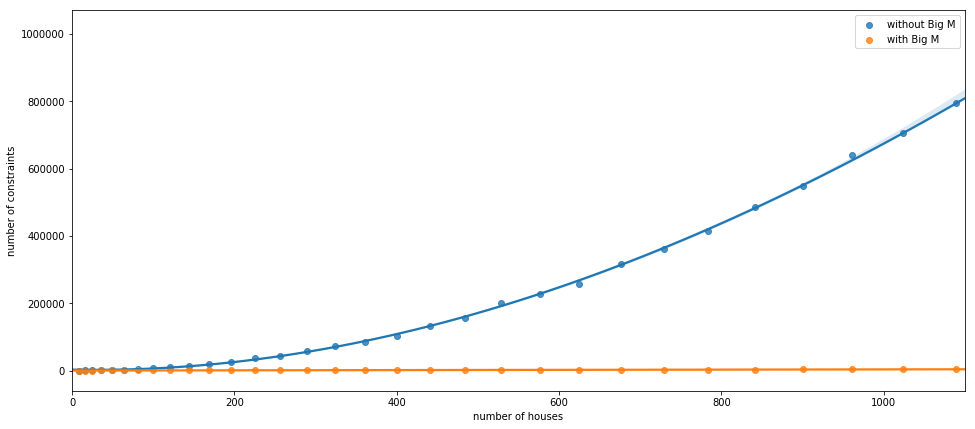

In [73]:
plt.figure(figsize = (16,7))
sns.regplot(x = pd.Series(n,name = "number of houses"), y = pd.Series(consO,name = "number of constraints"),order=3,label="without Big M")
sns.regplot(x = pd.Series(n,name = "number of houses"), y = pd.Series(consB,name = "number of constraints"),label = "with Big M")
plt.legend()
plt.xlim(0,1100)

(0, 1100)

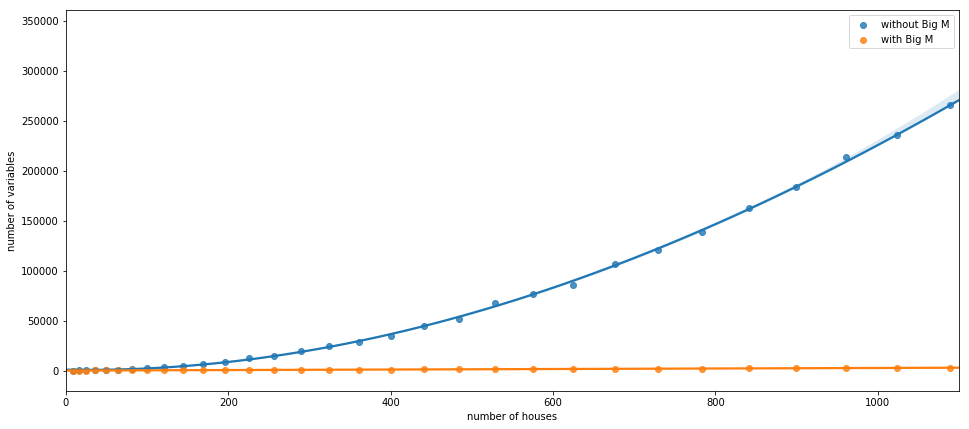

In [74]:
plt.figure(figsize = (16,7))
sns.regplot(x = pd.Series(n,name = "number of houses"), y = pd.Series(varO,name = "number of variables"),order=3,label="without Big M")
sns.regplot(x = pd.Series(n,name = "number of houses"), y = pd.Series(varB,name = "number of variables"),label = "with Big M")
plt.legend()
plt.xlim(0,1100)

(0, 1100)

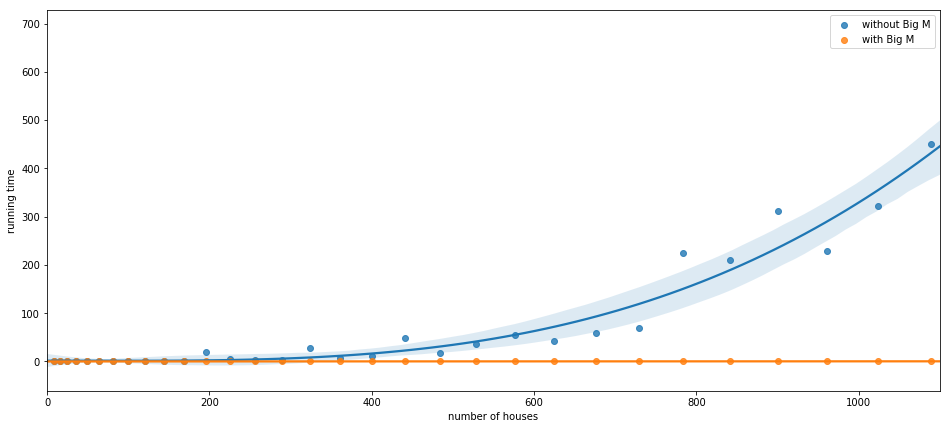

In [75]:
plt.figure(figsize = (16,7))
sns.regplot(x = pd.Series(n,name = "number of houses"), y = pd.Series(runtimeO,name = "running time"),order=3,label="without Big M")
sns.regplot(x = pd.Series(n,name = "number of houses"), y = pd.Series(runtimeB,name = "running time"),label = "with Big M")
plt.legend()
plt.xlim(0,1100)